In [2]:
import numpy as np
import flopy
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf

%matplotlib notebook


# make the screen bigger!
from IPython.display import display, HTML
display(HTML(data=""" <style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 99%; } </style> """))

In [3]:
# Assign name and create modflow model object
txtname = 'test_no_5'
model_name = flopy.modflow.Modflow(txtname, exe_name='mf2005')

# Load up MODFLOW files from GMS into flopy
these files need to be in the working directory, or can be pointed to 

In [130]:
dis = flopy.modflow.ModflowDis.load('TutCoast_simple5.dis', model_name)       # this command is neededed to load an existing .dis file   (essentially is grid geometry)
bas = flopy.modflow.ModflowBas.load('TutCoast_simple5.ba6',model_name)        #  load an existing .basic package                         (essentially is ibound and starting heads)
lpf = flopy.modflow.ModflowLpf.load('TutCoast_simple5.lpf', model_name)       #  load an existing .lpf file    
rch = flopy.modflow.ModflowRch.load('TutCoast_simple5.rch', model_name)



# addd the well package
wel = flopy.modflow.ModflowWel.load('TutCoast_simple5.wel', model_name)

# addd the obervations well package
hobs = flopy.modflow.ModflowHob.load('TutCoast_simple5.hob', model_name) 

# not sure why these generate different results
   # Add PCG package to the MODFLOW model
#pcg = flopy.modflow.ModflowPcg.load('TutCoast_simple3.pcg', model_name)    # COMMENT ONE OF THESE OUT
# Add PCG package to the MODFLOW model
pcg = flopy.modflow.ModflowPcg(model_name)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfdis.ModflowDis'> <class 'flopy.modflow.mfdis.ModflowDis'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfbas.ModflowBas'> <class 'flopy.modflow.mfbas.ModflowBas'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mflpf.ModflowLpf'> <class 'flopy.modflow.mflpf.ModflowLpf'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfrch.ModflowRch'> <class 'flopy.modflow.mfrch.ModflowRch'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfwel.ModflowWel'> <class 'flopy.modflow.mfwel.ModflowWel'>
replacing existing Package...
****Warning -- two packages of the same type:  <class 'flopy.modflow.mfhob.ModflowHob'> <class 'flopy.modflow.mfhob.ModflowHob'>
replacing existing Package...
****Warning -- two packages of the same type: 

In [131]:
# Add OC package to the MODFLOW model
spd = {(0, 0): ['print head', 'print budget', 'save head', 'save budget']}
oc = flopy.modflow.ModflowOc(model_name, stress_period_data=spd, compact=True)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfoc.ModflowOc'> <class 'flopy.modflow.mfoc.ModflowOc'>
replacing existing Package...


In [132]:
# Write the MODFLOW model input files
model_name.write_input()

In [133]:
# Run the MODFLOW model
success, buff = model_name.run_model()

FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.11.00 8/8/2013                        

 Using NAME file: test_no_5.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  9:38:10

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  9:38:10
 Elapsed run time:  0.038 Seconds

  Normal termination of simulation


<IPython.core.display.Javascript object>


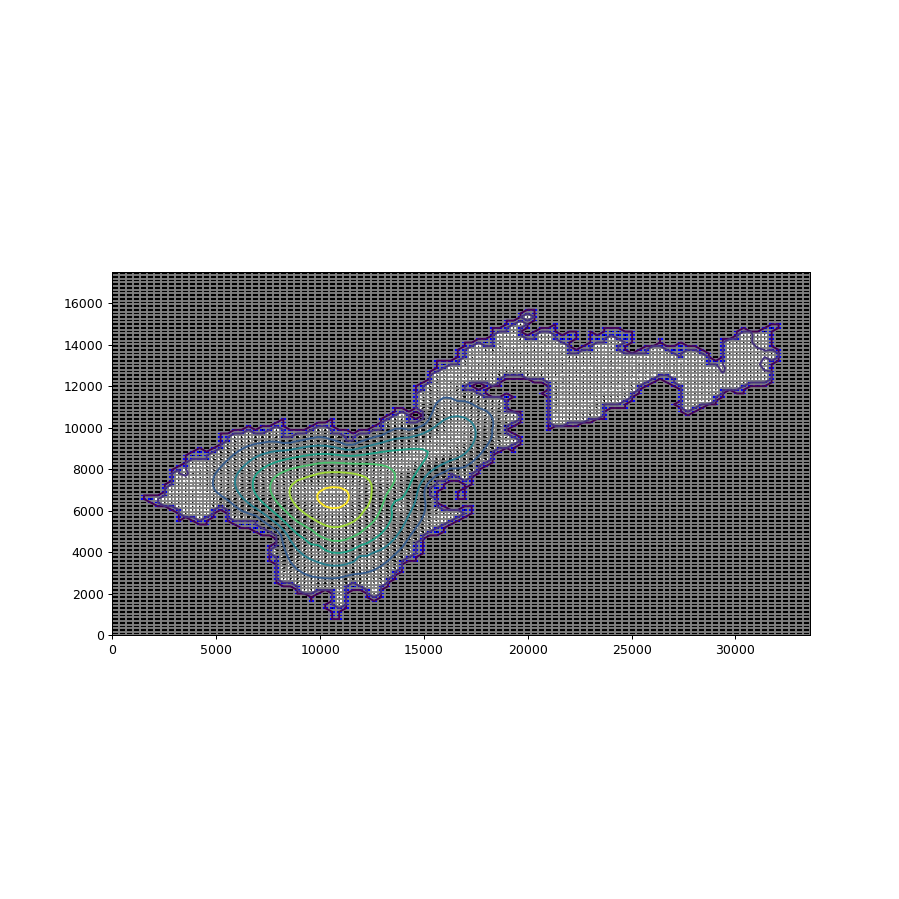

<IPython.core.display.Javascript object>


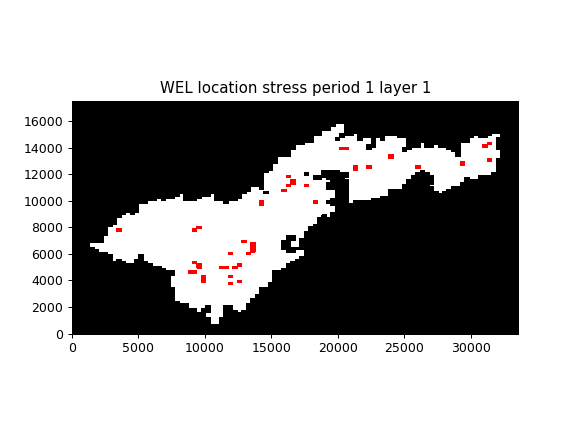

In [134]:
# Post process the results

hds = bf.HeadFile(txtname + '.hds')
head = hds.get_data(totim=1.0)
levels = np.linspace(0, 10, 11)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

hds = bf.HeadFile(txtname+'.hds')
times = hds.get_times()
head = hds.get_data(totim=times[-1])
levels = np.linspace(0, 10, 11)

cbb = bf.CellBudgetFile(txtname+'.cbc')
kstpkper_list = cbb.get_kstpkper()
frf = cbb.get_data(text='FLOW RIGHT FACE', totim=times[-1])[0]
fff = cbb.get_data(text='FLOW FRONT FACE', totim=times[-1])[0]

modelmap = flopy.plot.ModelMap(model=model_name, layer=0)
qm = modelmap.plot_ibound()
lc = modelmap.plot_grid()
cs = modelmap.contour_array(head, levels=levels)
quiver = modelmap.plot_discharge(frf, fff, head=head)


# plot well location
wel.plot()


#plt.savefig('tutorial1b.png')


In [65]:
# Assign name and create modflow model object
txtname = 'test_no_5'
model_name = flopy.modflow.Modflow(txtname, exe_name='mf2005')

dis = flopy.modflow.ModflowDis.load('TutCoast_simple5.dis', model_name)       # this command is neededed to load an existing .dis file   (essentially is grid geometry)
bas = flopy.modflow.ModflowBas.load('TutCoast_simple5.ba6',model_name)        #  load an existing .basic package                         (essentially is ibound and starting heads)
lpf = flopy.modflow.ModflowLpf.load('TutCoast_simple5.lpf', model_name)       #  load an existing .lpf file    
rch = flopy.modflow.ModflowRch.load('TutCoast_simple5.rch', model_name)

# addd the well package
wel = flopy.modflow.ModflowWel.load('TutCoast_simple5.wel', model_name)

# addd the obervations well package
hobs = flopy.modflow.ModflowHob.load('TutCoast_simple5.hob', model_name) 

# not sure why these generate different results
   # Add PCG package to the MODFLOW model
#pcg = flopy.modflow.ModflowPcg.load('TutCoast_simple3.pcg', model_name)    # COMMENT ONE OF THESE OUT
# Add PCG package to the MODFLOW model
pcg = flopy.modflow.ModflowPcg(model_name)

# Add OC package to the MODFLOW model
spd = {(0, 0): ['print head', 'print budget', 'save head', 'save budget']}
oc = flopy.modflow.ModflowOc(model_name, stress_period_data=spd, compact=True)

# Write the MODFLOW model input files
model_name.write_input()

# Run the MODFLOW model
success, buff = model_name.run_model()

observations = np.loadtxt('test_no_5.hob.out', skiprows=1, usecols=[0,1])
residuals= []
for idx, i in enumerate(observations):   
    r = observations[idx][1]-observations[idx][0]
    residuals.append(r)
    
top_draw = max(residuals)

print("maximum drawdown is {}".format(top_draw))

FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.11.00 8/8/2013                        

 Using NAME file: test_no_5.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  0:51:51

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  0:51:51
 Elapsed run time:  0.031 Seconds

  Normal termination of simulation
maximum drawdown is 1.4326028823900003


# Single cell running, with ability to tap observation package and well package

In [82]:
All_Qs = -89

# Assign name and create modflow model object
txtname = 'test_no_5'
model_name = flopy.modflow.Modflow(txtname, exe_name='mf2005')

dis = flopy.modflow.ModflowDis.load('TutCoast_simple5.dis', model_name)       # this command is neededed to load an existing .dis file   (essentially is grid geometry)
bas = flopy.modflow.ModflowBas.load('TutCoast_simple5.ba6',model_name)        #  load an existing .basic package                         (essentially is ibound and starting heads)
lpf = flopy.modflow.ModflowLpf.load('TutCoast_simple5.lpf', model_name)       #  load an existing .lpf file    
rch = flopy.modflow.ModflowRch.load('TutCoast_simple5.rch', model_name)


# yay here is where we can mess with the well pump rates (this changes all of them at once)
wel = flopy.modflow.ModflowWel.load('TutCoast_simple5.wel', model_name)
for idx, i in enumerate(wel.stress_period_data[1]):
    wel.stress_period_data[1][idx][3] = All_Qs

    
    
# addd the obervations well package
hobs = flopy.modflow.ModflowHob.load('TutCoast_simple5.hob', model_name) 

# not sure why these generate different results
   # Add PCG package to the MODFLOW model
#pcg = flopy.modflow.ModflowPcg.load('TutCoast_simple3.pcg', model_name)    # COMMENT ONE OF THESE OUT
# Add PCG package to the MODFLOW model
pcg = flopy.modflow.ModflowPcg(model_name)

# Add OC package to the MODFLOW model
spd = {(0, 0): ['print head', 'print budget', 'save head', 'save budget']}
oc = flopy.modflow.ModflowOc(model_name, stress_period_data=spd, compact=True)

# Write the MODFLOW model input files
model_name.write_input()

# Run the MODFLOW model
success, buff = model_name.run_model()

observations = np.loadtxt('test_no_5.hob.out', skiprows=1, usecols=[0,1])
residuals= []
for idx, i in enumerate(observations):   
    r = observations[idx][1]-observations[idx][0]
    residuals.append(r)
    
top_draw = max(residuals)

print("maximum drawdown is {}".format(top_draw))

FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.11.00 8/8/2013                        

 Using NAME file: test_no_5.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  0:57:44

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  0:57:44
 Elapsed run time:  0.031 Seconds

  Normal termination of simulation
maximum drawdown is 0.12737464905000007


In [160]:
All_Qs = -89

import numpy as np
import flopy
import flopy.utils.binaryfile as bf
import matplotlib.pyplot as plt



class Fin_Mod:
    """
    modflow model for multiple well pumping
    every values are represented as 2D np array
    """
    def __init__(self):


        # Assign name and create modflow model object
        txtname = 'test_no_5'
        self.model_name = flopy.modflow.Modflow(txtname, exe_name='mf2005')

        dis = flopy.modflow.ModflowDis.load('TutCoast_simple5.dis', self.model_name)       # this command is neededed to load an existing .dis file   (essentially is grid geometry)
        bas = flopy.modflow.ModflowBas.load('TutCoast_simple5.ba6',self.model_name)        #  load an existing .basic package                         (essentially is ibound and starting heads)
        lpf = flopy.modflow.ModflowLpf.load('TutCoast_simple5.lpf', self.model_name)       #  load an existing .lpf file    
        rch = flopy.modflow.ModflowRch.load('TutCoast_simple5.rch', self.model_name)       # load recharge
        hobs = flopy.modflow.ModflowHob.load('TutCoast_simple5.hob', self.model_name)      #  LOad OBS
        

        # Add PCG package to the MODFLOW model
        pcg = flopy.modflow.ModflowPcg(self.model_name)
        
        # Add OC package to the MODFLOW model
        spd = {(0, 0): ['print head', 'print budget', 'save head', 'save budget']}
        oc = flopy.modflow.ModflowOc(self.model_name, stress_period_data=spd, compact=True)
  


    def run(self, All_Qs):
        
        # yay here is where we can mess with the well pump rates (this changes all of them at once)
        wel = flopy.modflow.ModflowWel.load('TutCoast_simple5.wel', self.model_name)
                  
        for idx, i in enumerate(wel.stress_period_data[1]):
            wel.stress_period_data[1][idx][3] = All_Qs 
            
                # MODFLOW input
        # Write the MODFLOW model input files
        # If we cannot (over)write input files, try to write until it succeeds
        while True:
            try:
                self.model_name.write_input()
            except OSError as err:
                print("File writing error: %s" % (err))
            else:  # if we succeed, get out of the loop
                break

        # Run the MODFLOW model
        success, buff = self.model_name.run_model(silent=False)

        return success

    
    def head(self):
        """
            minimum head value
        """

        hds = bf.HeadFile(self.model_name + '.hds')
        times = hds.get_times()  # simulation time, steady state
        heads = hds.get_data(totim=times[-1])
        hds.close()  # close the file object for the next run

        return heads
    
    
    def minhead(self):
        """
            minimum head value
        """

        return self.head().min()
    
    
    def plot(self,title="head"):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1, 1, 1, aspect='equal')

        modelmap = flopy.plot.ModelMap(model=self.model_name, layer=0)
        qm = modelmap.plot_ibound()
        lc = modelmap.plot_grid()

        levels = np.linspace(self.head().min(), self.head().max(), 11)
        cs = modelmap.contour_array(self.head(), levels=levels)
        fig.colorbar(cs)
        plt.title(title)
        plt.show()
        return # return nothing, but function should end with return
    
    
    
    
   

In [167]:
All_Qs = -30000
Fin_Mod().run(All_Qs)

observations = np.loadtxt('test_no_5.hob.out', skiprows=1, usecols=[0,1])
residuals= []
for idx, i in enumerate(observations):   
    r = observations[idx][1]-observations[idx][0]
    residuals.append(r)
top_draw = max(residuals)
print("maximum drawdown is {}".format(top_draw))


rates = 
Sum_Q_list = []       
for idx, i in enumerate(wel.stress_period_data[1]):
    j = wel.stress_period_data[1][idx][3] 
    Sum_Q_list.append(j)
Sum_Q = sum(Sum_Q_list)
return Sum_Q



FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.11.00 8/8/2013                        

 Using NAME file: test_no_5.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  9:53:52

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  9:53:52
 Elapsed run time:  0.047 Seconds

  Normal termination of simulation
maximum drawdown is 44.564477920499996


In [161]:
 def total_Q(self, All_Qs): 
        """ 
        this is the total amount of water obtained by all the wells
    
        """
        Fin_Mod().run(All_Qs)
        
        Sum_Q_list = []
        
        for idx, i in enumerate(wel.stress_period_data[1]):
            j = wel.stress_period_data[1][idx][3] 
            Sum_Q_list.append(j)
        Sum_Q = sum(Sum_Q_list)
        return Sum_Q

rec.array([(0, 55, 27, -1000., 0., 1.,  1.),
           (0, 54, 28, -1000., 0., 1.,  2.),
           (0, 65, 35, -1000., 0., 1.,  3.),
           (0, 65, 39, -1000., 0., 1.,  4.),
           (0, 64, 40, -1000., 0., 1.,  5.),
           (0, 64, 40, -1000., 0., 1.,  6.),
           (0, 64, 40, -1000., 0., 1.,  7.),
           (0, 64, 40, -1000., 0., 1.,  8.),
           (0, 63, 40, -1000., 0., 1.,  9.),
           (0, 62, 40, -1000., 0., 1., 10.),
           (0, 61, 40, -1000., 0., 1., 11.),
           (0, 60, 38, -1000., 0., 1., 12.),
           (0, 60, 38, -1000., 0., 1., 13.),
           (0, 78, 35, -1000., 0., 1., 14.),
           (0, 78, 35, -1000., 0., 1., 15.),
           (0, 78, 35, -1000., 0., 1., 16.),
           (0, 77, 37, -1000., 0., 1., 17.),
           (0, 69, 27, -1000., 0., 1., 18.),
           (0, 70, 28, -1000., 0., 1., 19.),
           (0, 71, 28, -1000., 0., 1., 20.),
           (0, 73, 27, -1000., 0., 1., 21.),
           (0, 73, 26, -1000., 0., 1., 22.),
          

In [162]:
All_Qs = -300

Fin_Mod().total_Q(All_Qs)

FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.11.00 8/8/2013                        

 Using NAME file: test_no_5.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  9:52:52

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  9:52:52
 Elapsed run time:  0.032 Seconds

  Normal termination of simulation


-62000.0

# need to copy and paste this from this format into my stuff  

In [163]:
import scipy.optimize as opt
import numpy as np 

penalty = 100000 


All_Qs = -300
Fin_Mod().run(All_Qs)



observations = np.loadtxt('test_no_5.hob.out', skiprows=1, usecols=[0,1])
residuals= []
for idx, i in enumerate(observations):   
    r = observations[idx][1]-observations[idx][0]
    residuals.append(r)

top_draw = max(residuals)

print("maximum drawdown is {}".format(top_draw))





Sum_Q



FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.11.00 8/8/2013                        

 Using NAME file: test_no_5.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  9:53:02

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  9:53:02
 Elapsed run time:  0.047 Seconds

  Normal termination of simulation
maximum drawdown is 0.4294333458000006


-62000.0

In [ ]:

c = np.array([1.]) # minimize Q (maximize extraction); actually x0_bounds is defined for Q to be negative
# you can interpret this as head change should be smaller than allowable head change
A = np.array([[-head_change[0,4,4]]]) # head change at (4,4) due to pumping rate Q;
                                      # make sure this is negative due to Q < 0
                                      # this should be two dimensional array!
b = np.array([1.])                    # maximum allowable head change at (4,4)
x0_bounds = (None, 0)                 # Q <= 0
res = opt.linprog(c, A_ub=A, b_ub=b,
                  bounds=(x0_bounds),
                  options={"disp": True})


In [123]:
"""
Trash that can copy from
"""
import scipy.optimize as opt
from mymf_v3 import mymf
import numpy as np

# we will start with initial head = 1 m
# construct RMA
init_head = 1. # initial head
model = mymf(init_head=init_head)
well_rcs = [[4,4]]      # center
Qs = [-1.]              # unit pumping rate
model.run(well_rcs,Qs)
model.plot()

head = model.head() # note this array is 3D!
head_change = init_head - head

# minimum head should take place at the pumping well [4,4]

c = np.array([1.]) # minimize Q (maximize extraction); actually x0_bounds is defined for Q to be negative
# you can interpret this as head change should be smaller than allowable head change
A = np.array([[-head_change[0,4,4]]]) # head change at (4,4) due to pumping rate Q;
                                      # make sure this is negative due to Q < 0
                                      # this should be two dimensional array!
b = np.array([1.])                    # maximum allowable head change at (4,4)
x0_bounds = (None, 0)                 # Q <= 0
res = opt.linprog(c, A_ub=A, b_ub=b,
                  bounds=(x0_bounds),
                  options={"disp": True})

print('### result with minimal head constraint ###')
print(res)
print('the maximum pumping rate is %f' % (res.x))

# result plotting
init_head = 1. # initial head distribution = 1 m
model = mymf(init_head)
well_rcs = [[4,4]] # nrow = 10, ncol = 10
Qs = res.x # optimization solution
model.run(well_rcs,Qs)
model.plot('head at the center'

SyntaxError: unexpected EOF while parsing (<ipython-input-123-3bb446602e53>, line 43)

# awesone! This is how to run the model from a class

FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.11.00 8/8/2013                        

 Using NAME file: test_no_5.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  1:46:26

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/04/26  1:46:26
 Elapsed run time:  0.032 Seconds

  Normal termination of simulation


<IPython.core.display.Javascript object>


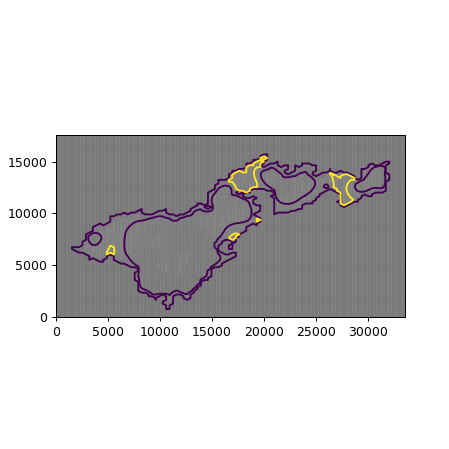

In [125]:
All_Qs = -30000
Fin_Mod().run(All_Qs)

# Post process the results

hds = bf.HeadFile(txtname + '.hds')
head = hds.get_data(totim=1.0)
levels = np.linspace(0, 10, 11)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

hds = bf.HeadFile(txtname+'.hds')
times = hds.get_times()
head = hds.get_data(totim=times[-1])
levels = np.linspace(0, 10, 11)

cbb = bf.CellBudgetFile(txtname+'.cbc')
kstpkper_list = cbb.get_kstpkper()
frf = cbb.get_data(text='FLOW RIGHT FACE', totim=times[-1])[0]
fff = cbb.get_data(text='FLOW FRONT FACE', totim=times[-1])[0]

modelmap = flopy.plot.ModelMap(model=model_name, layer=0)
qm = modelmap.plot_ibound()
lc = modelmap.plot_grid()
cs = modelmap.contour_array(head, levels=levels)
quiver = modelmap.plot_discharge(frf, fff, head=head)

In [ ]:
"""
mymf version 3:
- incorporate flat initial condition as input (line 170
- plot with automatically generated contour levels (line 128), ugly colorbar and title
"""
import numpy as np
import flopy
import flopy.utils.binaryfile as bf
import matplotlib.pyplot as plt

class mymf:
    """
    modflow model for multiple well pumping
    every values are represented as 2D np array
    """
    def __init__(self,init_head):
        """
        initialize parameters
        :param init_head: integer
        """

        # Assign name for modflow model object
        modelname = 'modflow'

        # Model domain and grid definition - we consider those values as given
        Lx = 1000.
        Ly = 1000.
        ztop = 0.
        zbot = -50.
        nlay = 1
        nrow = 10
        ncol = 10
        delr = Lx / ncol  # spacings along a row, can be an array
        delc = Ly / nrow  # spacings along a column, can be an array
        delv = (ztop - zbot) / nlay
        botm = np.linspace(ztop, zbot, nlay + 1)

        # Variables for the BAS package
        # active > 0, inactive = 0, or constant head < 0
        ibound = np.ones((nlay, nrow, ncol), dtype=np.int32)
        ibound[:, :, 0] = -1
        ibound[:, :, -1] = -1

        # initial head value also serves as boundary conditions
        strt = np.ones((nlay, nrow, ncol), dtype=np.float32)
        strt[:, :, 0] = init_head
        strt[:, :, -1] = init_head

        # to access variables within the class
        self.nrow = nrow
        self.ncol = ncol
        self.modelname = modelname

        # Create modflow model object
        self.mf = flopy.modflow.Modflow(modelname, exe_name='mf2005')

        # Create the discretization object
        dis = flopy.modflow.ModflowDis(self.mf, nlay, nrow, ncol, delr=delr, delc=delc,
                                       top=ztop, botm=botm[1:])

        # Add BAS package
        bas = flopy.modflow.ModflowBas(self.mf, ibound=ibound, strt=strt)

        # Add LPF package to the MODFLOW model
        # hk array of horizontal hydraulic conductivity, vka vertical hydraulic conductivity
        lpf = flopy.modflow.ModflowLpf(self.mf, hk=10., vka=10., ipakcb=53)

        # Add OC package to the MODFLOW model
        spd = {(0, 0): ['print head', 'print budget', 'save head', 'save budget']}
        oc = flopy.modflow.ModflowOc(self.mf, stress_period_data=spd, compact=True)

        # Add PCG package to the MODFLOW model
        pcg = flopy.modflow.ModflowPcg(self.mf)

    def run(self, well_rcs, Qs):
        wel_sp = []
        for items in zip(well_rcs,Qs):
            wel_sp.append([0, items[0][0], items[0][1], items[1]])  # lay, row, col index, pumping rate
            stress_period_data = {0: wel_sp}  # define well stress period {period, well info dictionary}

        wel = flopy.modflow.ModflowWel(self.mf, stress_period_data=stress_period_data)

        # MODFLOW input
        # Write the MODFLOW model input files
        # If we cannot (over)write input files, try to write until it succeeds
        while True:
            try:
                self.mf.write_input()
            except OSError as err:
                print("File writing error: %s" % (err))
            else:  # if we succeed, get out of the loop
                break

        # Run the MODFLOW model
        success, buff = self.mf.run_model(silent=True)

        return success


    def head(self):
        """
            minimum head value
        """

        hds = bf.HeadFile(self.modelname + '.hds')
        times = hds.get_times()  # simulation time, steady state
        heads = hds.get_data(totim=times[-1])
        hds.close()  # close the file object for the next run

        return heads

    def minhead(self):
        """
            minimum head value
        """

        return self.head().min()

    def plot(self,title="head"):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1, 1, 1, aspect='equal')

        modelmap = flopy.plot.ModelMap(model=self.mf, layer=0)
        qm = modelmap.plot_ibound()
        lc = modelmap.plot_grid()

        levels = np.linspace(self.head().min(), self.head().max(), 11)
        cs = modelmap.contour_array(self.head(), levels=levels)
        fig.colorbar(cs)
        plt.title(title)
        plt.show()
        return # return nothing, but function should end with return

In [ ]:
# junks!

In [66]:
for idx, i in enumerate(wel.stress_period_data[1]):
    wel.stress_period_data[1][idx][3] = -70000
    
 #   print(wel.stress_period_data[1][idx])

# getting a better understanding of how to work with Flopy objects

In [143]:
print(vars(dis))   # these are the data held withint the dis package

{'parent': MODFLOW 1 layer(s), 100 row(s), 100 column(s), 1 stress period(s), 'extension': ['dis'], 'file_name': ['test_no_3.dis'], 'fn_path': '.\\test_no_3.dis', 'name': ['DIS'], 'unit_number': [11], 'extra': [''], 'url': 'dis.htm', 'allowDuplicates': False, 'acceptable_dtypes': [<class 'int'>, <class 'numpy.float32'>, <class 'str'>], 'nrow': 100, 'ncol': 100, 'nlay': 1, 'nper': 1, 'heading': '# DIS package for  MODFLOW-2005, generated by Flopy.', 'laycbd': <flopy.utils.util_array.Util2d object at 0x0000018805CE07F0>, 'delr': <flopy.utils.util_array.Util2d object at 0x0000018806EEF4A8>, 'delc': <flopy.utils.util_array.Util2d object at 0x0000018806EEF898>, 'top': <flopy.utils.util_array.Util2d object at 0x0000018806EEF748>, 'botm': <flopy.utils.util_array.Util3d object at 0x0000018806EEF6D8>, 'perlen': <flopy.utils.util_array.Util2d object at 0x0000018806EEF668>, 'nstp': <flopy.utils.util_array.Util2d object at 0x0000018806EEF0F0>, 'tsmult': <flopy.utils.util_array.Util2d object at 0x0

In [144]:
print(vars(wel))   # these are the data held withint the dis package

{'parent': MODFLOW 1 layer(s), 100 row(s), 100 column(s), 1 stress period(s), 'extension': ['wel'], 'file_name': ['test_no_3.wel'], 'fn_path': '.\\test_no_3.wel', 'name': ['WEL'], 'unit_number': [20], 'extra': [''], 'url': 'wel.htm', 'allowDuplicates': False, 'acceptable_dtypes': [<class 'int'>, <class 'numpy.float32'>, <class 'str'>], 'heading': '# WEL package for  MODFLOW-2005, generated by Flopy.', 'ipakcb': 40, 'np': 0, 'specify': False, 'dtype': dtype((numpy.record, [('k', '<i4'), ('i', '<i4'), ('j', '<i4'), ('flux', '<f4'), ('iface', '<f4'), ('qfact', '<f4'), ('cellgrp', '<f4')])), 'options': ['AUX IFACE', 'AUX QFACT', 'AUX CELLGRP'], 'stress_period_data': <flopy.utils.util_list.MfList object at 0x0000018805316518>}


In [160]:
print(vars(wel.stress_period_data)  )  # the locations rates and whatnot from the wells 


{'package': 
    MODFLOW Well Package Class.

    Parameters
    ----------
    model : model object
        The model object (of type :class:`flopy.modflow.mf.Modflow`) to which
        this package will be added.
    ipakcb : int
        A flag that is used to determine if cell-by-cell budget data should be
        saved. If ipakcb is non-zero cell-by-cell budget data will be saved.
        (default is 0).
    stress_period_data : list of boundaries, or recarray of boundaries, or
        dictionary of boundaries
        Each well is defined through definition of
        layer (int), row (int), column (int), flux (float).
        The simplest form is a dictionary with a lists of boundaries for each
        stress period, where each list of boundaries itself is a list of
        boundaries. Indices of the dictionary are the numbers of the stress
        period. This gives the form of:

            stress_period_data =
            {0: [
                [lay, row, col, flux],
           

In [17]:
# can access individual lines
print( wel.stress_period_data[5][0] )
print( wel.stress_period_data[1][1][1] )

(0, 55, 27, -1000.0, 0.0, 1.0, 1.0)
54


<IPython.core.display.Javascript object>


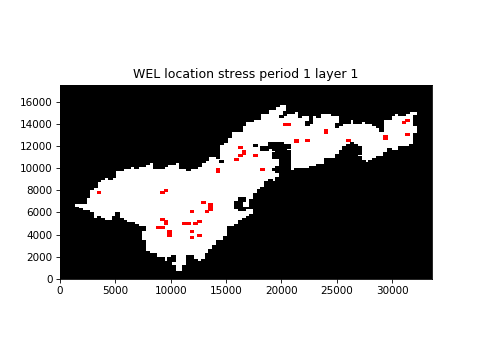

In [18]:
wel.plot()